In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [8]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=/usr
!make
!make install
%cd ..


--2024-08-07 17:52:18--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-08-07 17:52:18--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-08-07 17:52:18--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

In [9]:
!pip install TA-Lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.32-cp310-cp310-linux_x86_64.whl size=2063332 sha256=33cf8259891afc1107b79da8e9ac06a17d98c0ebe60016938cd57a89919a71de
  Stored in directory: /root/.cache/pip/wheels/c3/21/bd/ca95eb09997c2a18fce271b98b10ffa9fcafbaa161be864dd7
Successfully built TA-Lib


In [1]:
import talib as ta

In [170]:
data=pd.read_csv('/content/drive/MyDrive/Blockhouse/xnas-itch-20230703.tbbo.csv')
data.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
0,1688371200660869841,1688371200660704717,1,2,32,T,B,0,194120000000,1,130,165124,303634,193630000000,194120000000,27,27,1,1,AAPL
1,1688371201201402566,1688371201201237816,1,2,32,T,B,0,194110000000,2,130,164750,304724,193900000000,194110000000,5,400,1,1,AAPL
2,1688371201233688992,1688371201233524761,1,2,32,T,B,0,194110000000,8,130,164231,304850,193900000000,194110000000,5,398,1,1,AAPL
3,1688371201317556361,1688371201317392163,1,2,32,T,B,0,194110000000,2,130,164198,305101,193900000000,194110000000,5,390,1,1,AAPL
4,1688371201478520666,1688371201478356044,1,2,32,T,B,0,194000000000,7,130,164622,306430,193900000000,194000000000,5,200,1,1,AAPL


In [171]:
data.isna().sum()

,0
ts_recv,0
ts_event,0
rtype,0
publisher_id,0
instrument_id,0
action,0
side,0
depth,0
price,0
size,0


In [172]:
data.dtypes

,0
ts_recv,int64
ts_event,int64
rtype,int64
publisher_id,int64
instrument_id,int64
action,object
side,object
depth,int64
price,int64
size,int64


In [173]:
data['ts_recv'] = pd.to_datetime(data['ts_recv'])
data['ts_event'] = pd.to_datetime(data['ts_event'])

print(data['publisher_id'].unique())
print(data['instrument_id'].unique())
print(data['rtype'].unique())
print(data['action'].unique())
print(data['depth'].unique())




[2]
[32]
[1]
['T']
[0]


In [174]:
data=data.drop(columns=['publisher_id','instrument_id','rtype','action','depth'],axis=1).copy()
data.head()

,ts_recv,ts_event,side,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
0,2023-07-03 08:00:00.660869841,2023-07-03 08:00:00.660704717,B,194120000000,1,130,165124,303634,193630000000,194120000000,27,27,1,1,AAPL
1,2023-07-03 08:00:01.201402566,2023-07-03 08:00:01.201237816,B,194110000000,2,130,164750,304724,193900000000,194110000000,5,400,1,1,AAPL
2,2023-07-03 08:00:01.233688992,2023-07-03 08:00:01.233524761,B,194110000000,8,130,164231,304850,193900000000,194110000000,5,398,1,1,AAPL
3,2023-07-03 08:00:01.317556361,2023-07-03 08:00:01.317392163,B,194110000000,2,130,164198,305101,193900000000,194110000000,5,390,1,1,AAPL
4,2023-07-03 08:00:01.478520666,2023-07-03 08:00:01.478356044,B,194000000000,7,130,164622,306430,193900000000,194000000000,5,200,1,1,AAPL


In [175]:
def plot_distribution(data, column, title, top_n=None, sample_n=None):
    plt.figure(figsize=(8, 4))
    if top_n:
        data[column].value_counts().nlargest(top_n).plot(kind='bar')
    elif sample_n:
        data[column].value_counts().sample(sample_n).plot(kind='bar')
    else:
        data[column].value_counts().plot(kind='bar')

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()



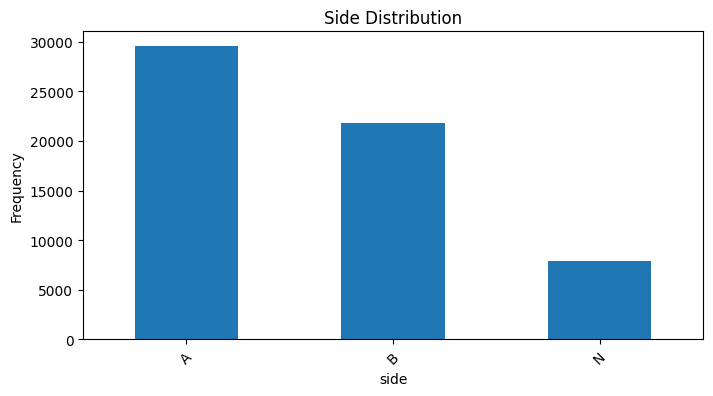

In [176]:
plot_distribution(data, 'side', 'Side Distribution')


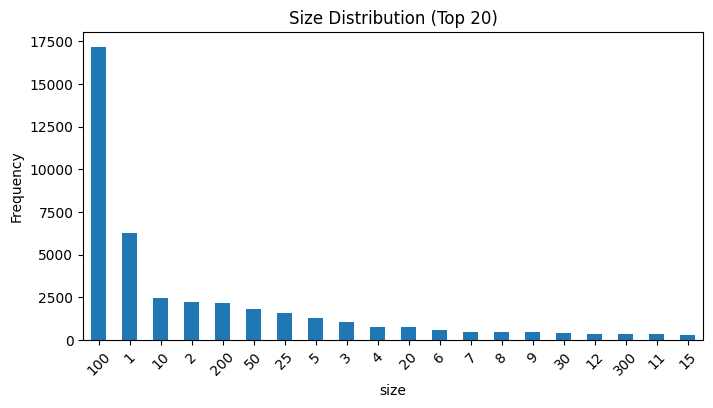

In [177]:
plot_distribution(data, 'size', 'Size Distribution (Top 20)', top_n=20)


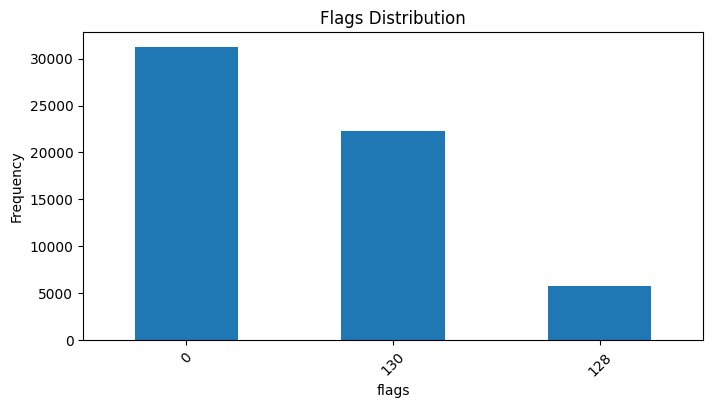

In [178]:
plot_distribution(data, 'flags', 'Flags Distribution')


# Normalize & Convert Data

In [179]:
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['price'] =data['price'] / 1e6


In [180]:
data[['bid_px_00','ask_px_00','price']]

,bid_px_00,ask_px_00,price
0,193.63,194.12,194120.0
1,193.90,194.11,194110.0
2,193.90,194.11,194110.0
3,193.90,194.11,194110.0
4,193.90,194.00,194000.0
...,...,...,...
59266,192.40,192.44,192440.0
59267,192.40,192.44,192440.0
59268,192.40,192.46,192400.0
59269,192.40,192.45,192450.0


In [181]:

data['Close'] = data['price']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

# Simple Moving Averages

In [182]:
# Simple Moving Averages
data['sma5'] = data['price'].rolling(window=5).mean()
data['sma10'] = data['price'].rolling(window=10).mean()

# Exponential Moving Average
data['ema10'] = data['price'].ewm(span=10, adjust=False).mean()


#Relative Strength Index (RSI)

In [183]:
data['RSI'] = ta.RSI(data['Close'], timeperiod=14)


#Moving Average Convergence Divergence (MACD)

In [184]:
data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

#Stochastic Oscillator


In [185]:
data['Stoch_k'], data['Stoch_d'] = ta.STOCH(data['High'], data['Low'], data['Close'],
                                                      fastk_period=14, slowk_period=3, slowd_period=3)

In [186]:
# Bid-Ask Spread
data['bid_ask_spread'] = (data['ask_px_00'] - data['bid_px_00']) / data['bid_px_00']

data['log_return'] = np.log(data['price']).diff()

# Rolling Standard Deviation of Prices (5-minute window)
data['rolling_std'] = data['price'].rolling(window=5*60).std()

# Order Book Imbalance
data['total_depth'] = data['bid_sz_00'] + data['ask_sz_00']
data['volume_imbalance'] = (data['bid_sz_00'] - data['ask_sz_00']) / data['total_depth']


In [187]:
data.columns

Index(['ts_recv', 'ts_event', 'side', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'symbol', 'Close', 'High', 'Low', 'Open',
       'sma5', 'sma10', 'ema10', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist',
       'Stoch_k', 'Stoch_d', 'bid_ask_spread', 'log_return', 'rolling_std',
       'total_depth', 'volume_imbalance'],
      dtype='object')

In [188]:
data.isna().sum()

,0
ts_recv,0
ts_event,0
side,0
price,0
size,0
flags,0
ts_in_delta,0
sequence,0
bid_px_00,0
ask_px_00,0


In [189]:
data=data.dropna().copy()
data

,ts_recv,ts_event,side,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,...,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance
299,2023-07-03 08:11:08.479939816,2023-07-03 08:11:08.479769664,N,193960.0,10,130,170152,741846,193.93,194.00,...,-7.624277,-10.609226,2.984949,3.460108e+08,3.829187e+08,0.000361,0.000000,88.077567,701,-0.997147
300,2023-07-03 08:11:30.432562313,2023-07-03 08:11:30.432397079,B,193990.0,98,130,165234,754123,193.97,193.99,...,-4.583367,-9.404054,4.820687,2.768230e+08,3.352508e+08,0.000103,0.000155,88.264046,298,0.342282
301,2023-07-03 08:11:31.974882982,2023-07-03 08:11:31.974718545,B,194000.0,224,130,164437,755240,193.97,194.00,...,-1.350935,-7.793430,6.442495,2.768420e+08,2.998919e+08,0.000155,0.000052,88.419865,1203,-0.667498
302,2023-07-03 08:11:31.974889234,2023-07-03 08:11:31.974725138,B,194000.0,112,130,164096,755243,193.97,194.00,...,1.196992,-5.995346,7.192338,2.768611e+08,2.768420e+08,0.000155,0.000000,88.573886,979,-0.591420
303,2023-07-03 08:11:31.974897569,2023-07-03 08:11:31.974733512,B,194000.0,112,130,164057,755244,193.97,194.00,...,3.179591,-4.160358,7.339949,2.768658e+08,2.768563e+08,0.000155,0.000000,88.726120,867,-0.538639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59266,2023-07-03 20:59:14.514485218,2023-07-03 20:59:14.514320323,B,192440.0,6,130,164895,252532002,192.40,192.44,...,5.001563,6.367963,-1.366401,5.873343e+08,6.229172e+08,0.000208,0.000208,39.268166,47,0.702128
59267,2023-07-03 20:59:21.020718430,2023-07-03 20:59:21.020553920,B,192440.0,1,130,164510,252532102,192.40,192.44,...,6.354581,6.365287,-0.010706,5.339767e+08,5.873343e+08,0.000208,0.000000,39.283664,41,0.951220
59268,2023-07-03 20:59:33.297905504,2023-07-03 20:59:33.297741235,A,192400.0,5,130,164269,252532347,192.40,192.46,...,4.151338,5.922497,-1.771159,4.271947e+08,5.161686e+08,0.000312,-0.000208,39.093348,46,0.739130
59269,2023-07-03 20:59:56.889779362,2023-07-03 20:59:56.889614660,B,192450.0,3,130,164702,252532944,192.40,192.45,...,6.366446,6.011287,0.355159,3.737981e+08,4.449898e+08,0.000260,0.000260,39.158142,51,0.372549


#1. Price and Moving Averages (Time Series Plot)


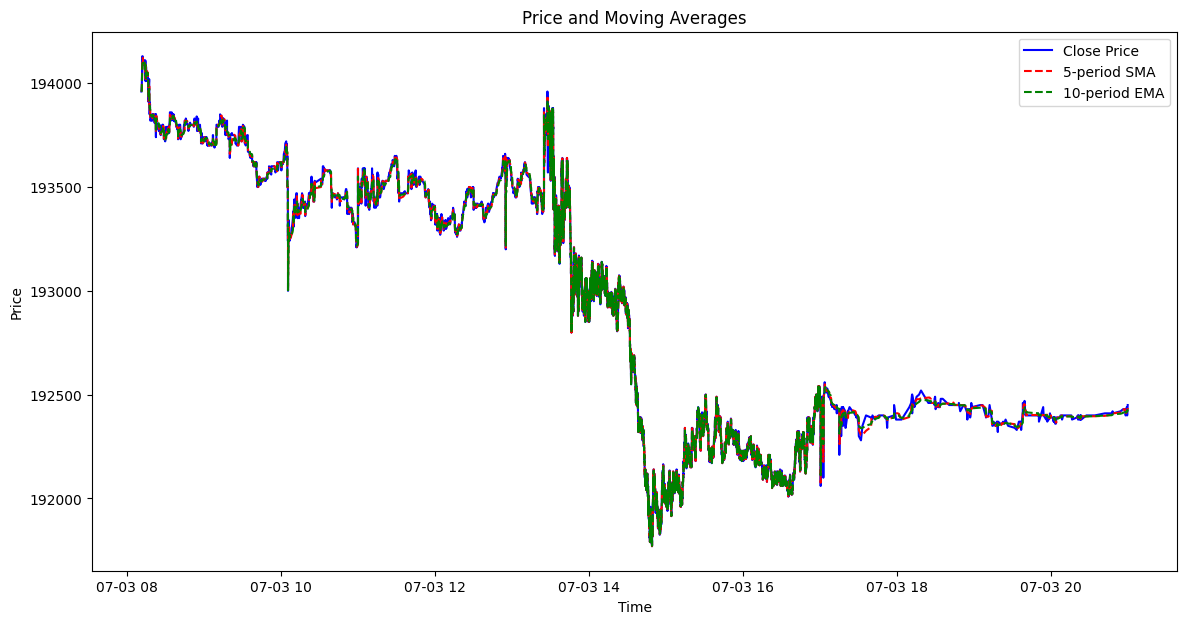

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['ts_recv'], data['Close'], label='Close Price', color='blue')
plt.plot(data['ts_recv'], data['sma5'], label='5-period SMA', color='red', linestyle='--')
plt.plot(data['ts_recv'], data['ema10'], label='10-period EMA', color='green', linestyle='--')
plt.title('Price and Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


#2. RSI and Stochastic Oscillator (Subplots)


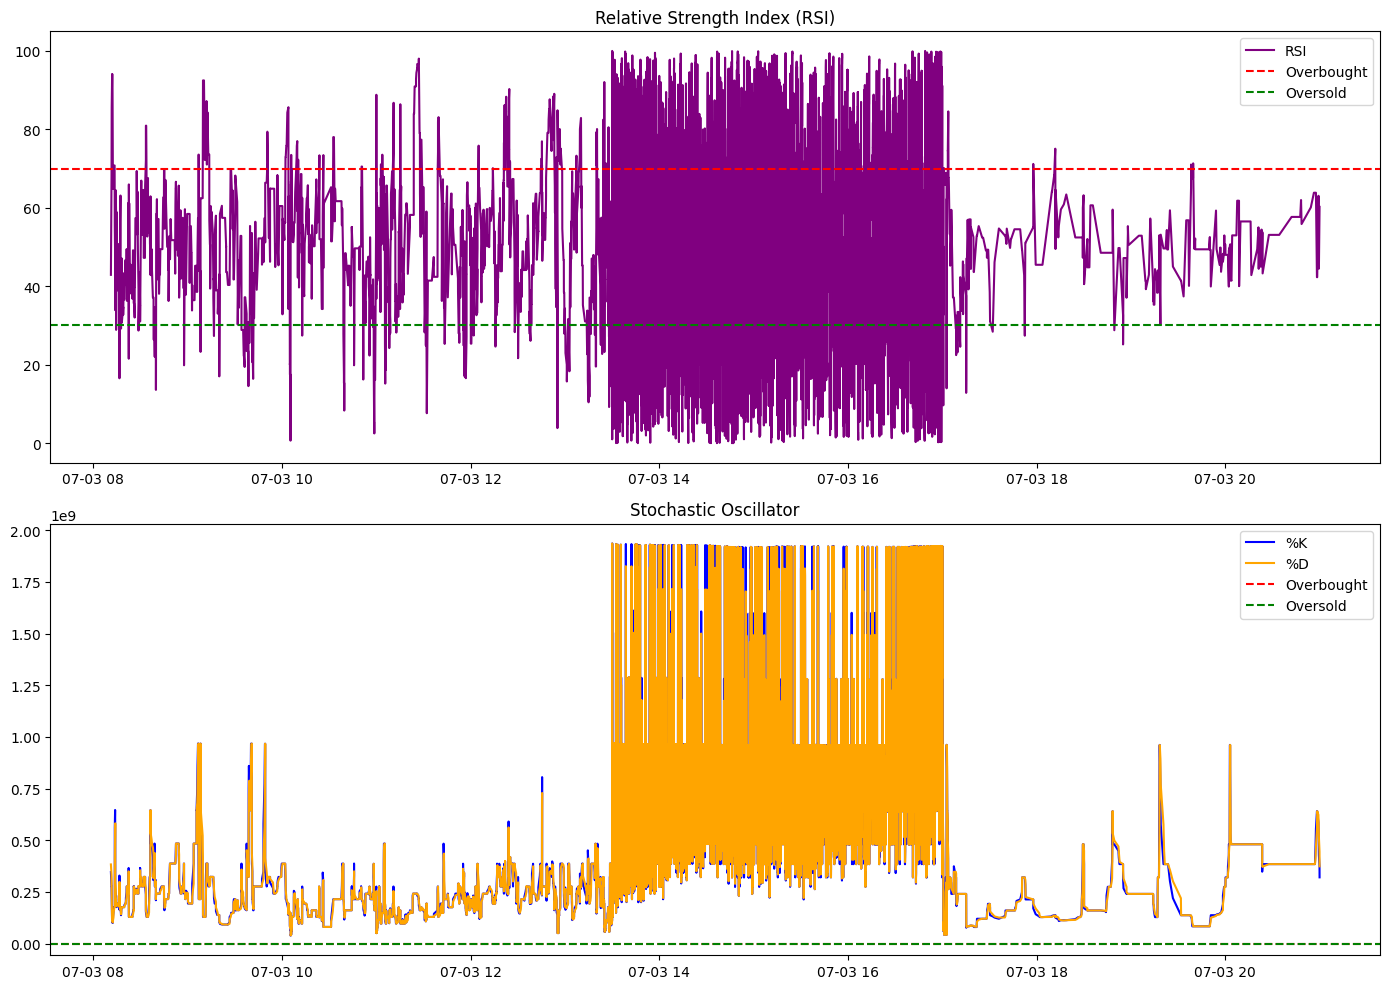

In [191]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(data['ts_recv'], data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['ts_recv'], data['Stoch_k'], label='%K', color='blue')
plt.plot(data['ts_recv'], data['Stoch_d'], label='%D', color='orange')
plt.axhline(80, linestyle='--', color='red', label='Overbought')
plt.axhline(20, linestyle='--', color='green', label='Oversold')
plt.title('Stochastic Oscillator')
plt.legend()

plt.tight_layout()
plt.show()


3. Bid-Ask Spread (Line Plot)


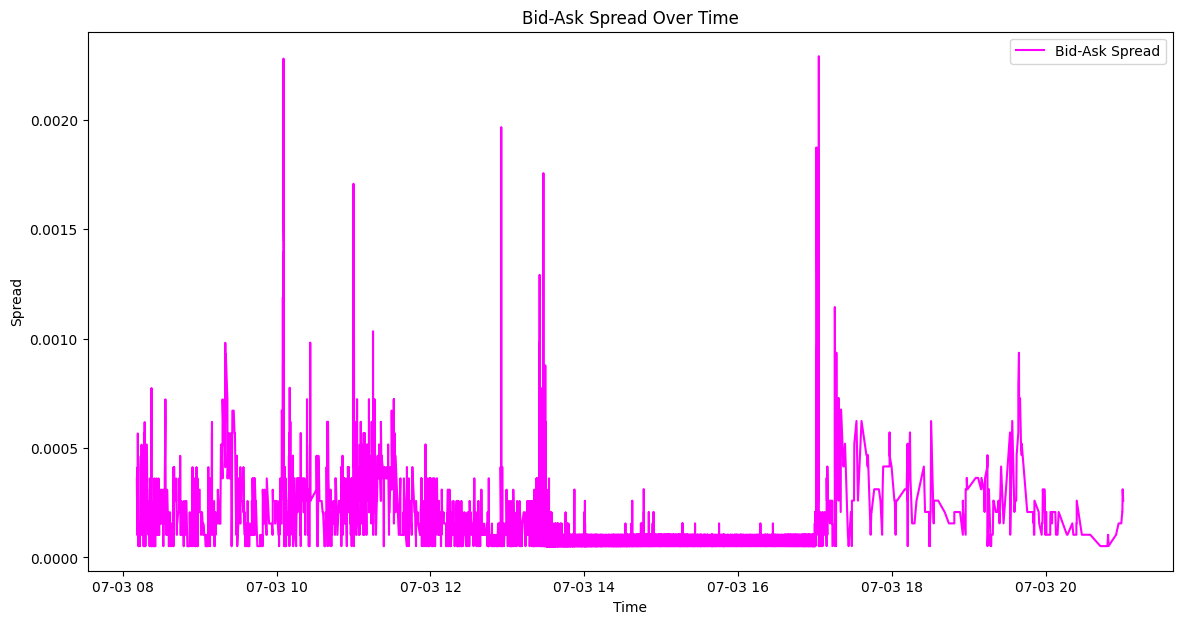

In [192]:
plt.figure(figsize=(14, 7))
plt.plot(data['ts_recv'], data['bid_ask_spread'], label='Bid-Ask Spread', color='magenta')
plt.title('Bid-Ask Spread Over Time')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()


4. Log Returns and Volatility (Scatter Plot)


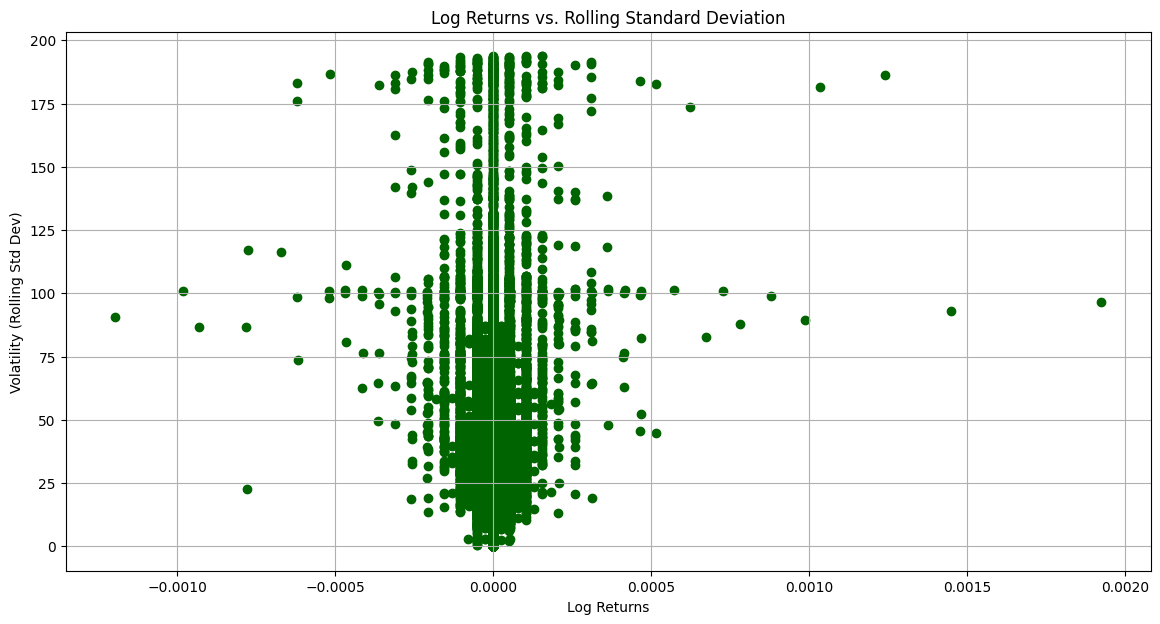

In [193]:
plt.figure(figsize=(14, 7))
plt.scatter(data['log_return'], data['rolling_std'], color='darkgreen')
plt.title('Log Returns vs. Rolling Standard Deviation')
plt.xlabel('Log Returns')
plt.ylabel('Volatility (Rolling Std Dev)')
plt.grid(True)
plt.show()


In [202]:

data['future_price'] = data['price'].shift(-7)

# Define a smaller threshold for price change (example: 1% for buy/sell)
threshold = 0.00001  # 0.001%

# Create the target variable 'trade_signal'
data['trade_signal'] = np.where(data['future_price'] > data['price'] * (1 + threshold), 'Buy',
                                np.where(data['future_price'] < data['price'] * (1 - threshold), 'Sell', 'Hold'))

# Drop the last row as it will have a NaN value for 'future_price'
data.dropna(inplace=True)

data[['price', 'future_price', 'trade_signal']].head()


,price,future_price,trade_signal
299,193960.0,194000.0,Buy
300,193990.0,194000.0,Buy
301,194000.0,194000.0,Hold
302,194000.0,194000.0,Hold
303,194000.0,194000.0,Hold


In [203]:
data[['price', 'future_price', 'trade_signal']]


,price,future_price,trade_signal
299,193960.0,194000.0,Buy
300,193990.0,194000.0,Buy
301,194000.0,194000.0,Hold
302,194000.0,194000.0,Hold
303,194000.0,194000.0,Hold
...,...,...,...
59259,192430.0,192440.0,Buy
59260,192430.0,192440.0,Buy
59261,192430.0,192400.0,Sell
59262,192430.0,192450.0,Buy


In [204]:
data['trade_signal'].value_counts()

,count
trade_signal,
Sell,20524
Hold,19529
Buy,18912


#Columns to Drop

Timestamps (ts_recv, ts_event)

Redundant Price Columns (price)

Raw Trade and Order Book Counts (size, bid_sz_00, ask_sz_00, bid_ct_00, ask_ct_00):

Sequence and Flags (sequence, flags)

Future Price (future_price) data leakage


In [205]:
columns_to_drop = ['ts_recv', 'ts_event','symbol','side','ts_in_delta', 'price', 'size', 'flags', 'sequence', 'bid_px_00','ask_px_00','bid_sz_00', 'ask_sz_00', 'bid_ct_00', 'ask_ct_00', 'future_price']

data = data.drop(columns=columns_to_drop,axis=1).copy()
data.head()


,Close,High,Low,Open,sma5,sma10,ema10,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,trade_signal
299,193960.0,194.00,193.93,193960.0,193960.0,193955.0,193958.701952,42.917947,-7.624277,-10.609226,2.984949,3.460108e+08,3.829187e+08,0.000361,0.000000,88.077567,701,-0.997147,Buy
300,193990.0,193.99,193.97,193960.0,193966.0,193960.0,193964.392506,63.793463,-4.583367,-9.404054,4.820687,2.768230e+08,3.352508e+08,0.000103,0.000155,88.264046,298,0.342282,Buy
301,194000.0,194.00,193.97,193990.0,193974.0,193966.0,193970.866596,67.995091,-1.350935,-7.793430,6.442495,2.768420e+08,2.998919e+08,0.000155,0.000052,88.419865,1203,-0.667498,Hold
302,194000.0,194.00,193.97,194000.0,193982.0,193971.0,193976.163579,67.995091,1.196992,-5.995346,7.192338,2.768611e+08,2.768420e+08,0.000155,0.000000,88.573886,979,-0.591420,Hold
303,194000.0,194.00,193.97,194000.0,193990.0,193975.0,193980.497473,67.995091,3.179591,-4.160358,7.339949,2.768658e+08,2.768563e+08,0.000155,0.000000,88.726120,867,-0.538639,Hold


In [206]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'sma5', 'sma10', 'ema10', 'RSI', 'MACD',
       'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d', 'bid_ask_spread',
       'log_return', 'rolling_std', 'total_depth', 'volume_imbalance',
       'trade_signal'],
      dtype='object')

In [207]:
data.to_csv('/content/drive/MyDrive/Blockhouse/data.csv',index=False)

In [208]:
df=pd.read_csv('/content/drive/MyDrive/Blockhouse/data.csv')
df.head()

,Close,High,Low,Open,sma5,sma10,ema10,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,trade_signal
0,193960.0,194.00,193.93,193960.0,193960.0,193955.0,193958.701952,42.917947,-7.624277,-10.609226,2.984949,3.460108e+08,3.829187e+08,0.000361,0.000000,88.077567,701,-0.997147,Buy
1,193990.0,193.99,193.97,193960.0,193966.0,193960.0,193964.392506,63.793463,-4.583367,-9.404054,4.820687,2.768230e+08,3.352508e+08,0.000103,0.000155,88.264046,298,0.342282,Buy
2,194000.0,194.00,193.97,193990.0,193974.0,193966.0,193970.866596,67.995091,-1.350935,-7.793430,6.442495,2.768420e+08,2.998919e+08,0.000155,0.000052,88.419865,1203,-0.667498,Hold
3,194000.0,194.00,193.97,194000.0,193982.0,193971.0,193976.163579,67.995091,1.196992,-5.995346,7.192338,2.768611e+08,2.768420e+08,0.000155,0.000000,88.573886,979,-0.591420,Hold
4,194000.0,194.00,193.97,194000.0,193990.0,193975.0,193980.497473,67.995091,3.179591,-4.160358,7.339949,2.768658e+08,2.768563e+08,0.000155,0.000000,88.726120,867,-0.538639,Hold


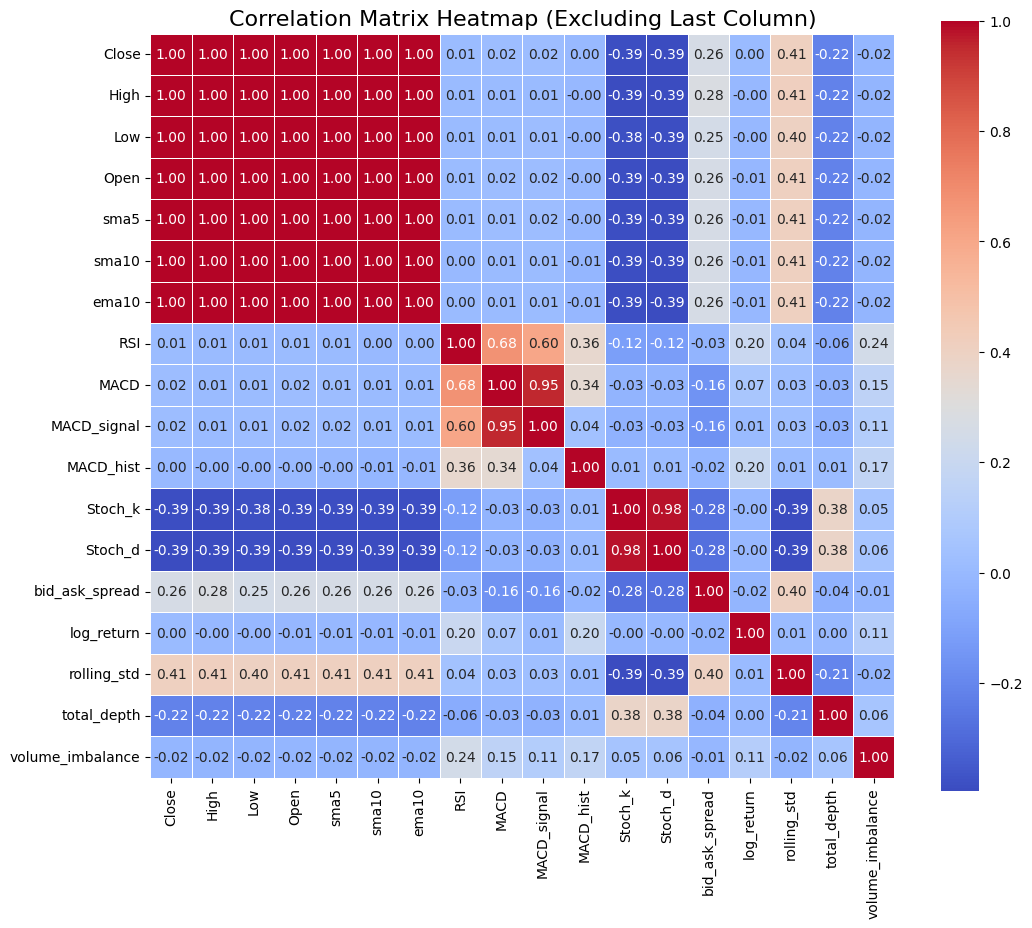

In [209]:
correlation_matrix = df.iloc[:, :-1].corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Matrix Heatmap (Excluding Last Column)', fontsize=16)
plt.show()


Choose 'Close' Only:

Rationale: 'Close' is typically considered a comprehensive reflection of the day’s trading conditions and is widely used as the primary price metric in financial analyses and predictive modeling.


Benefits: Simplifies the model and focuses on the key data point that reflects final daily market consensus, reducing overfitting risks associated with multicollinearity.

In [210]:
#removing highly correlated features
corr_columns = ['High', 'Low', 'Open', 'sma5', 'sma10','ema10']
df=df.drop(columns=corr_columns,axis=1).copy()
df.head()



,Close,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,trade_signal
0,193960.0,42.917947,-7.624277,-10.609226,2.984949,3.460108e+08,3.829187e+08,0.000361,0.000000,88.077567,701,-0.997147,Buy
1,193990.0,63.793463,-4.583367,-9.404054,4.820687,2.768230e+08,3.352508e+08,0.000103,0.000155,88.264046,298,0.342282,Buy
2,194000.0,67.995091,-1.350935,-7.793430,6.442495,2.768420e+08,2.998919e+08,0.000155,0.000052,88.419865,1203,-0.667498,Hold
3,194000.0,67.995091,1.196992,-5.995346,7.192338,2.768611e+08,2.768420e+08,0.000155,0.000000,88.573886,979,-0.591420,Hold
4,194000.0,67.995091,3.179591,-4.160358,7.339949,2.768658e+08,2.768563e+08,0.000155,0.000000,88.726120,867,-0.538639,Hold


Stoch_k (Fast Stochastic): Provides immediate feedback on price movements within the designated period. Its sensitivity to price changes makes it highly responsive, which is crucial in HFT where opportunities can appear and disappear within fractions of a second.

Consider using MACD for strategies that can tolerate a bit of noise but need faster response times.( HFT )


So drop Stock_d in this case

In [211]:
df=df.drop(columns=['Stoch_d','MACD_signal'],axis=1).copy()
df.head()


,Close,RSI,MACD,MACD_hist,Stoch_k,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,trade_signal
0,193960.0,42.917947,-7.624277,2.984949,3.460108e+08,0.000361,0.000000,88.077567,701,-0.997147,Buy
1,193990.0,63.793463,-4.583367,4.820687,2.768230e+08,0.000103,0.000155,88.264046,298,0.342282,Buy
2,194000.0,67.995091,-1.350935,6.442495,2.768420e+08,0.000155,0.000052,88.419865,1203,-0.667498,Hold
3,194000.0,67.995091,1.196992,7.192338,2.768611e+08,0.000155,0.000000,88.573886,979,-0.591420,Hold
4,194000.0,67.995091,3.179591,7.339949,2.768658e+08,0.000155,0.000000,88.726120,867,-0.538639,Hold


In [212]:
df.to_csv('/content/drive/MyDrive/Blockhouse/data_final.csv',index=False)

In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
data = pd.read_csv('/content/drive/MyDrive/Blockhouse/data_final.csv')


In [3]:
data.columns

Index(['Close', 'RSI', 'MACD', 'MACD_hist', 'Stoch_k', 'bid_ask_spread',
       'log_return', 'rolling_std', 'total_depth', 'volume_imbalance',
       'trade_signal'],
      dtype='object')

#Data Preparation

In [4]:
target = 'trade_signal'
features = data.drop(columns=[target])

# Encode categorical target variable
label_encoder = LabelEncoder()
encoded_signals = label_encoder.fit_transform(data[target])
categorical_signals = to_categorical(encoded_signals)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Time-based splitting
split_point1 = int(len(data) * 0.7)  # 70% for training
split_point2 = int(len(data) * 0.9)  # Additional 20% for validation, 10% for testing

train_features = scaled_features[:split_point1]
train_labels = categorical_signals[:split_point1]

val_features = scaled_features[split_point1:split_point2]
val_labels = categorical_signals[split_point1:split_point2]

test_features = scaled_features[split_point2:]
test_labels = categorical_signals[split_point2:]



n_features = features.shape[1]  # Number of features

# Reshape data for LSTM input, adding the time step dimension (assuming 1 time step per sample for now)
train_features = train_features.reshape((train_features.shape[0], 1, n_features))
val_features = val_features.reshape((val_features.shape[0], 1, n_features))
test_features = test_features.reshape((test_features.shape[0], 1, n_features))


In [5]:
input_shape = (train_features.shape[1], train_features.shape[2])  # (time steps, features)
num_classes = train_labels.shape[1]  # Number of output classes


In [6]:
train_features

array([[[0.9279661 , 0.42918133, 0.5575861 , ..., 0.45463061,
         0.019931  , 0.00139761]],

       [[0.94067797, 0.6379374 , 0.57447524, ..., 0.45559316,
         0.00844002, 0.67119848]],

       [[0.94491525, 0.67995386, 0.59242808, ..., 0.45639745,
         0.03424482, 0.1662434 ]],

       ...,

       [[0.22033898, 0.62369219, 0.62048005, ..., 0.20382365,
         0.01020786, 0.694505  ]],

       [[0.22457627, 0.7708121 , 0.62334278, ..., 0.20129978,
         0.02999629, 0.84827775]],

       [[0.22457627, 0.7708121 , 0.62531887, ..., 0.19871859,
         0.02683129, 0.84207324]]])

#LSTM Model





In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(train_labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(name='precision')])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 1, 50)               │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,278 (235.46 KB)

 Trainable params: 60,278 (235.46 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:


from keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, mode='min', verbose=1)

# Train the model
history = model.fit(train_features, train_labels, epochs=50, batch_size=64, validation_data=(val_features, val_labels), callbacks=[early_stopping,reduce_lr], verbose=2)


Epoch 1/50
645/645 - 10s - 16ms/step - accuracy: 0.4408 - loss: 1.0424 - precision: 0.6073 - val_accuracy: 0.4480 - val_loss: 1.0622 - val_precision: 0.5274 - learning_rate: 0.0010
Epoch 2/50
645/645 - 5s - 8ms/step - accuracy: 0.4719 - loss: 1.0196 - precision: 0.6071 - val_accuracy: 0.4495 - val_loss: 1.0589 - val_precision: 0.5207 - learning_rate: 0.0010
Epoch 3/50
645/645 - 11s - 16ms/step - accuracy: 0.4740 - loss: 1.0176 - precision: 0.6076 - val_accuracy: 0.4539 - val_loss: 1.0596 - val_precision: 0.5340 - learning_rate: 0.0010
Epoch 4/50
645/645 - 11s - 17ms/step - accuracy: 0.4752 - loss: 1.0165 - precision: 0.6021 - val_accuracy: 0.4547 - val_loss: 1.0581 - val_precision: 0.5323 - learning_rate: 0.0010
Epoch 5/50
645/645 - 11s - 16ms/step - accuracy: 0.4758 - loss: 1.0145 - precision: 0.6092 - val_accuracy: 0.4559 - val_loss: 1.0520 - val_precision: 0.5368 - learning_rate: 0.0010
Epoch 6/50
645/645 - 8s - 13ms/step - accuracy: 0.4748 - loss: 1.0133 - precision: 0.6053 - val_a

185/185 - 1s - 3ms/step - accuracy: 0.4838 - loss: 1.0258 - precision: 0.5854
Test Loss: 1.0257513523101807, Test Accuracy: 0.4838053286075592, Test Precision: 0.585357129573822


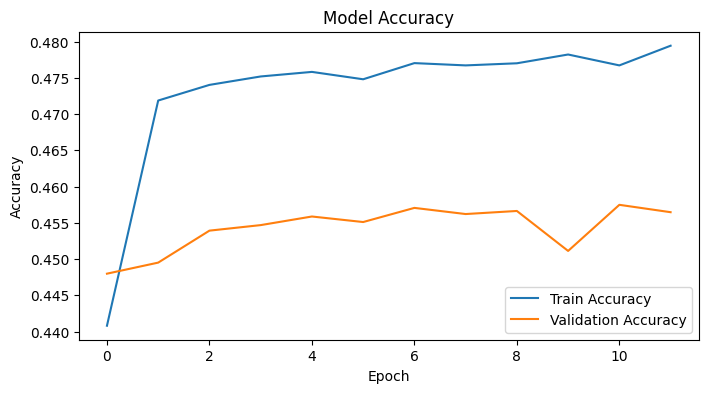

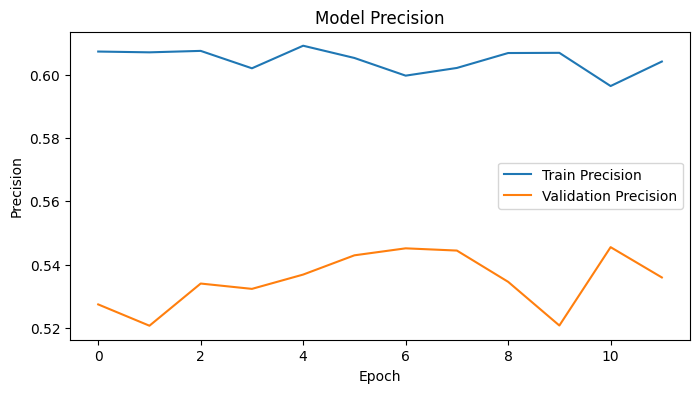

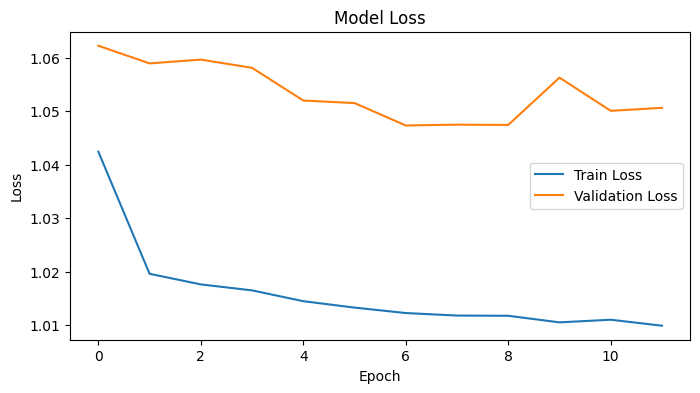

In [39]:
# Evaluate the model
test_loss, test_acc, test_precision = model.evaluate(test_features, test_labels, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")

import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Precision plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [40]:
# Generate predictions for the test dataset
test_predictions = model.predict(test_features)
# Convert probabilities to class indices
predicted_class_indices = np.argmax(test_predictions, axis=1)


185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [41]:
predicted_class_indices

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
column_names = [
    'Close', 'RSI', 'MACD', 'MACD_hist', 'Stoch_k', 'bid_ask_spread',
    'log_return', 'rolling_std', 'total_depth', 'volume_imbalance'
]

test_features_reshaped = test_features.reshape(test_features.shape[0], test_features.shape[2])


true_class_indices = np.argmax(test_labels, axis=1)

true_class_labels = label_encoder.inverse_transform(true_class_indices)
predicted_class_labels = label_encoder.inverse_transform(predicted_class_indices)

test_features_df = pd.DataFrame(test_features_reshaped, columns=column_names)


results_df_lstm = test_features_df.copy()
results_df_lstm['Ground Truth'] = true_class_labels
results_df_lstm['Predicted'] = predicted_class_labels

In [54]:
results_df_lstm.to_csv('/content/drive/MyDrive/Blockhouse/results_df_lstm.csv', index=False)


#GRU

In [70]:
from tensorflow.keras.layers import GRU, Dense, Dropout
# Define the GRU model architecture
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=25,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_labels.shape[1], activation='softmax'))  # Using softmax for multiclass classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(name='precision')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                         │ (None, 1, 50)               │           9,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 1, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_12 (GRU)                         │ (None, 1, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 25)                  │           5,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,753 (178.72 KB)

 Trainable params: 45,753 (178.72 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Train the model
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    batch_size=64,
    validation_data=(val_features, val_labels),
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

Epoch 1/50
645/645 - 10s - 16ms/step - accuracy: 0.4559 - loss: 1.0365 - precision: 0.5934 - val_accuracy: 0.4492 - val_loss: 1.0699 - val_precision: 0.5184 - learning_rate: 0.0010
Epoch 2/50
645/645 - 8s - 12ms/step - accuracy: 0.4707 - loss: 1.0209 - precision: 0.6013 - val_accuracy: 0.4370 - val_loss: 1.0696 - val_precision: 0.4839 - learning_rate: 0.0010
Epoch 3/50
645/645 - 7s - 11ms/step - accuracy: 0.4711 - loss: 1.0192 - precision: 0.6048 - val_accuracy: 0.4492 - val_loss: 1.0547 - val_precision: 0.5122 - learning_rate: 0.0010
Epoch 4/50
645/645 - 5s - 8ms/step - accuracy: 0.4722 - loss: 1.0174 - precision: 0.6020 - val_accuracy: 0.4509 - val_loss: 1.0564 - val_precision: 0.5263 - learning_rate: 0.0010
Epoch 5/50
645/645 - 6s - 10ms/step - accuracy: 0.4726 - loss: 1.0159 - precision: 0.6012 - val_accuracy: 0.4504 - val_loss: 1.0597 - val_precision: 0.5103 - learning_rate: 0.0010
Epoch 6/50
645/645 - 9s - 14ms/step - accuracy: 0.4742 - loss: 1.0138 - precision: 0.6038 - val_accu

In [73]:
# Evaluate the model on the test set
test_loss, test_acc, test_precision = model.evaluate(test_features, test_labels, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


185/185 - 1s - 3ms/step - accuracy: 0.4897 - loss: 1.0301 - precision: 0.5850
Test Loss: 1.0300923585891724, Test Accuracy: 0.4897405505180359, Test Precision: 0.5850052833557129


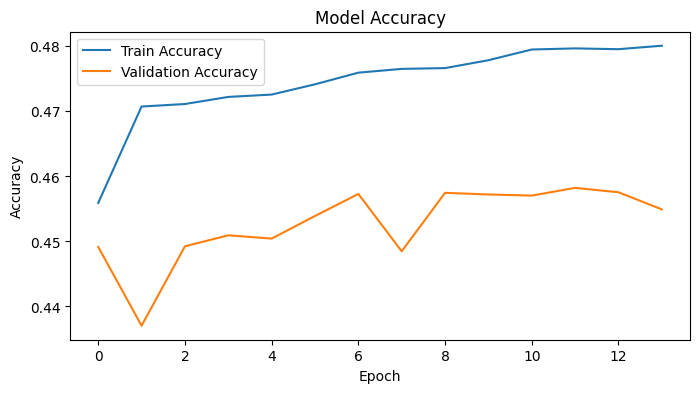

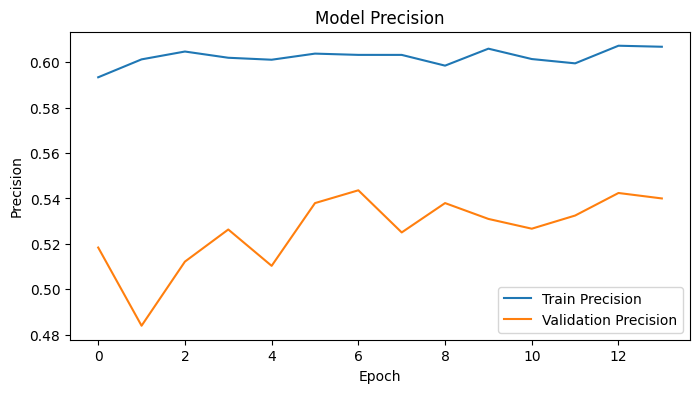

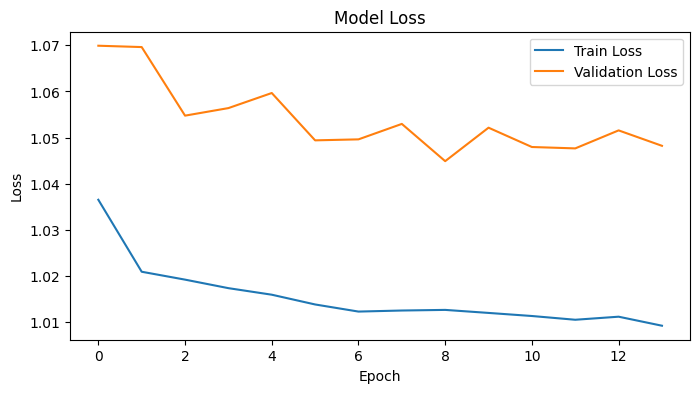

In [74]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Precision plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [75]:
# Generate predictions for the test dataset
test_predictions = model.predict(test_features)
# Convert probabilities to class indices
predicted_class_indices = np.argmax(test_predictions, axis=1)


column_names = [
    'Close', 'RSI', 'MACD', 'MACD_hist', 'Stoch_k', 'bid_ask_spread',
    'log_return', 'rolling_std', 'total_depth', 'volume_imbalance'
]

test_features_reshaped = test_features.reshape(test_features.shape[0], test_features.shape[2])


true_class_indices = np.argmax(test_labels, axis=1)

true_class_labels = label_encoder.inverse_transform(true_class_indices)
predicted_class_labels = label_encoder.inverse_transform(predicted_class_indices)

test_features_df = pd.DataFrame(test_features_reshaped, columns=column_names)


results_df_GRU = test_features_df.copy()
results_df_GRU['Ground Truth'] = true_class_labels
results_df_GRU['Predicted'] = predicted_class_labels

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [76]:
results_df_GRU

,Close,RSI,MACD,MACD_hist,Stoch_k,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,Ground Truth,Predicted
0,0.194915,0.705943,0.656895,0.484155,0.187852,0.000224,0.383346,0.159070,0.022668,0.592268,Buy,Buy
1,0.194915,0.705943,0.653289,0.479220,0.215966,0.000224,0.383346,0.160443,0.021955,0.579061,Buy,Buy
2,0.194915,0.705943,0.649855,0.475518,0.232835,0.000224,0.383346,0.161786,0.016937,0.454728,Buy,Buy
3,0.194915,0.705943,0.646596,0.472804,0.232835,0.000224,0.383346,0.163099,0.014086,0.344773,Buy,Buy
4,0.194915,0.705943,0.643511,0.470880,0.232835,0.000224,0.383346,0.164385,0.012061,0.235295,Buy,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,0.279661,0.638504,0.654427,0.509337,0.182440,0.046621,0.383346,0.202424,0.002595,0.645215,Buy,Buy
5893,0.279661,0.638504,0.654867,0.505119,0.182440,0.046621,0.383346,0.202539,0.002338,0.714349,Buy,Buy
5894,0.279661,0.638504,0.654585,0.500720,0.227469,0.046621,0.383346,0.202603,0.002196,0.759563,Sell,Buy
5895,0.279661,0.638504,0.653742,0.496401,0.272498,0.046621,0.383346,0.202664,0.002139,0.779292,Buy,Buy


In [77]:
results_df_GRU.to_csv('/content/drive/MyDrive/Blockhouse/results_df_GRU.csv', index=False)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

n_classes = train_labels.shape[1]  # adjust based on your actual number of classes


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [13]:
# Building the model
input_shape = train_features.shape[1:]  # Shape of the data
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

In [14]:
model.compile(
    loss="categorical_crossentropy",  # Changed from sparse_categorical_crossentropy to categorical_crossentropy
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
     metrics=['accuracy', Precision(name='precision')]
)

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 1, 10)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_4    │ (None, 1, 10)          │         44,042 │ input_layer_2[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 1, 10)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_8     │ (None, 1, 10)          │             20 │ dropout_18[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 1, 10)          │              0 │ layer_normalization_8… │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 1, 4)           │             44 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 1, 4)           │              0 │ conv1d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 1, 10)          │             50 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 1, 10)          │             20 │ conv1d_9[0][0]         │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 1, 10)          │              0 │ layer_normalization_9… │
│                           │                        │                │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_5    │ (None, 1, 10)          │         44,042 │ add_9[0][0],           │
│ (MultiHeadAttention)      │                        │                │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 1, 10)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_10    │ (None, 1, 10)          │             20 │ dropout_21[0][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 1, 10)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 1, 4)           │             44 │ add_10[0][0]           │
├──────────────────────

 Total params: 178,499 (697.26 KB)

 Trainable params: 178,499 (697.26 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_features,
    train_labels,
    validation_data=(val_features, val_labels),
    epochs=150,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


645/645 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.3356 - loss: 1.2482 - precision: 0.3343 - val_accuracy: 0.2262 - val_loss: 1.1023 - val_precision: 0.0000e+00
Epoch 2/150
645/645 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3439 - loss: 1.1404 - precision: 0.3586 - val_accuracy: 0.3602 - val_loss: 1.0963 - val_precision: 0.0000e+00
Epoch 3/150
645/645 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3496 - loss: 1.1188 - precision: 0.3601 - val_accuracy: 0.4270 - val_loss: 1.0959 - val_precision: 0.0000e+00
Epoch 4/150
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3626 - loss: 1.1062 - precision: 0.3839 - val_accuracy: 0.4329 - val_loss: 1.0902 - val_precision: 0.0000e+00
Epoch 5/150
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3673 - loss: 1.1030 - precision: 0.3898 - val_accuracy: 0.3974 - val_loss: 1.0932 - val_precision: 0.0000e+00
Epoch 6/150
645/645 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3656 - loss: 1.1004 - precision: 0.4211 - val_accuracy: 0

In [16]:


# Evaluate the model on the test set
test_loss, test_acc, test_precision = model.evaluate(test_features, test_labels, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}")


185/185 - 3s - 14ms/step - accuracy: 0.4663 - loss: 1.0455 - precision: 0.5934
Test Loss: 1.045521855354309, Test Accuracy: 0.4663388133049011, Test Precision: 0.5933690667152405


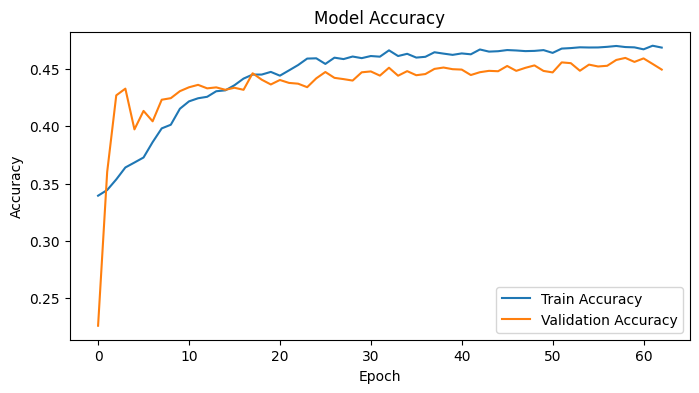

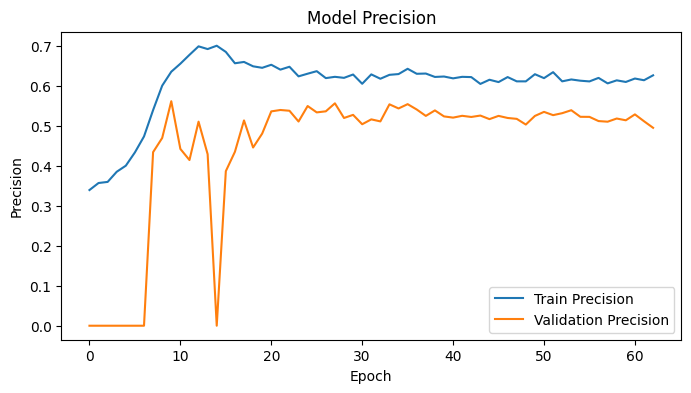

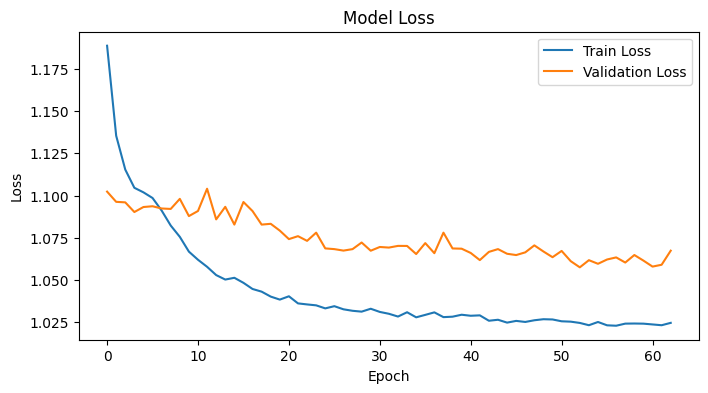

In [17]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Precision plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [18]:
# Generate predictions for the test dataset
test_predictions = model.predict(test_features)
# Convert probabilities to class indices
predicted_class_indices = np.argmax(test_predictions, axis=1)


column_names = [
    'Close', 'RSI', 'MACD', 'MACD_hist', 'Stoch_k', 'bid_ask_spread',
    'log_return', 'rolling_std', 'total_depth', 'volume_imbalance'
]

test_features_reshaped = test_features.reshape(test_features.shape[0], test_features.shape[2])


true_class_indices = np.argmax(test_labels, axis=1)

true_class_labels = label_encoder.inverse_transform(true_class_indices)
predicted_class_labels = label_encoder.inverse_transform(predicted_class_indices)

test_features_df = pd.DataFrame(test_features_reshaped, columns=column_names)


results_df_transformer = test_features_df.copy()
results_df_transformer['Ground Truth'] = true_class_labels
results_df_transformer['Predicted'] = predicted_class_labels

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [19]:
results_df_transformer

,Close,RSI,MACD,MACD_hist,Stoch_k,bid_ask_spread,log_return,rolling_std,total_depth,volume_imbalance,Ground Truth,Predicted
0,0.194915,0.705943,0.656895,0.484155,0.187852,0.000224,0.383346,0.159070,0.022668,0.592268,Buy,Buy
1,0.194915,0.705943,0.653289,0.479220,0.215966,0.000224,0.383346,0.160443,0.021955,0.579061,Buy,Buy
2,0.194915,0.705943,0.649855,0.475518,0.232835,0.000224,0.383346,0.161786,0.016937,0.454728,Buy,Buy
3,0.194915,0.705943,0.646596,0.472804,0.232835,0.000224,0.383346,0.163099,0.014086,0.344773,Buy,Buy
4,0.194915,0.705943,0.643511,0.470880,0.232835,0.000224,0.383346,0.164385,0.012061,0.235295,Buy,Sell
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,0.279661,0.638504,0.654427,0.509337,0.182440,0.046621,0.383346,0.202424,0.002595,0.645215,Buy,Buy
5893,0.279661,0.638504,0.654867,0.505119,0.182440,0.046621,0.383346,0.202539,0.002338,0.714349,Buy,Buy
5894,0.279661,0.638504,0.654585,0.500720,0.227469,0.046621,0.383346,0.202603,0.002196,0.759563,Sell,Buy
5895,0.279661,0.638504,0.653742,0.496401,0.272498,0.046621,0.383346,0.202664,0.002139,0.779292,Buy,Buy


In [20]:
results_df_transformer.to_csv('/content/drive/MyDrive/Blockhouse/results_df_transformer.csv', index=False)
